<a href="https://colab.research.google.com/github/np03cs4a240070-oss/worksheetsAI-umikapoudel/blob/main/Week4workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. Load the Dataset:
import pandas as pd
import numpy as np
#• Read the dataset into a pandas DataFrame.
df = pd.read_csv("/content/drive/MyDrive/Dataset/diabetes_.csv")
#• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset.(e.g., check data types, missing values, summary statistics).
print(df.head()) #first 5
print(df.info()) #info
print(df.isnull().sum()) #summary

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [4]:
# Handle Missing Data:
#• Handle any missing values appropriately, either by dropping or imputing them based on the data.
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    df[col] = df[col].replace(0, df[col].mean())
print((df[zero_columns] == 0).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [23]:
# Feature Engineering:
#• Separate the feature matrix (X) and target variable (y).
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values
#• Perform a train - test split from scratch using a 70% − 30% ratio.
def train_test_split(X, y, test_size=0.3, random_state=1):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_len = int(len(X) * test_size)
    test_idx = indices[:test_len]
    train_idx = indices[test_len:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [15]:
#Implement KNN:
# Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
import numpy as np

# Compute distances using Euclidean distance.
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
# Write functions for:
# Predicting the class for a single query.
def knn_predict_single(X_train, y_train, query, k):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], query)
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]

    labels = [label for _, label in k_nearest]
    return max(set(labels), key=labels.count)

# Predicting classes for all test samples.
def knn_predict(X_train, y_train, X_test, k):
    predictions = []

    for sample in X_test:
        predictions.append(knn_predict_single(X_train, y_train, sample, k))

    return np.array(predictions)

#Evaluate the performance using accuracy.
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Run KNN
k = 5
y_pred = knn_predict(X_train, y_train, X_test, k)
acc = accuracy(y_test, y_pred)

print("Accuracy:", acc)


Accuracy: 0.7565217391304347


In [16]:
#2 Repeat the Classification Task:
# Scale the Feature matrix X.
def min_max_scaling(X):
    X_scaled = np.zeros_like(X, dtype=float)

    for i in range(X.shape[1]):
        col_min = X[:, i].min()
        col_max = X[:, i].max()
        X_scaled[:, i] = (X[:, i] - col_min) / (col_max - col_min)

    return X_scaled
X_scaled = min_max_scaling(X)
# Use the scaled data for training and testing the kNN Classifier.
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y)
k = 5
y_pred_scaled = knn_predict(X_train_s, y_train, X_test_s, k)
# Record the results.
acc_scaled = accuracy(y_test, y_pred_scaled)
print("Accuracy with Scaled Features:", acc_scaled)

Accuracy with Scaled Features: 0.7913043478260869


In [ ]:
# Comparative Analysis: Compare the Results -
# Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.
  #Original (unscaled) dataset and Scaled dataset (using Min–Max normalization)
  #difference in accuracy because of scaled and unscaled data
# Discuss:
# How scaling impacted the KNN performance.
  #scaling improved the performance of the kNN classifier. After scaling, the accuracy increased compared to the unscaled dataset.Since kNN is a distance-based algorithm,
  #it relies on calculating distances between data points. Scaling ensures that all features contribute equally to the distance computation.
# The reason for any observed changes in accuracy.
  #In the unscaled dataset, features like Glucose and Insulin have much larger numeric ranges compared to features like BMI or Diabetes Pedigree Function.
  #These large-range features dominate the Euclidean distance, reducing the influence of other important features.
  #After scaling, all features are brought to a common range [0,1], preventing any single feature from overpowering the distance calculation.
  #This leads to more meaningful nearest neighbors and improved classification accuracy.

In [21]:
#3 Vary the number of neighbors - k:
# Run the KNN model on both the original and scaled datasets for a range of:
#k= 1, 2, 3, . . . 15
# For each k, record:
import time
#original
results_original = []
for k in range(1, 16):
    start_time = time.time()
    y_pred = knn_predict(X_train, y_train, X_test, k)
    end_time = time.time()
    # Accuracy.
    acc = accuracy(y_test, y_pred)
    # Time taken to make predictions.
    prediction_time = end_time - start_time
    results_original.append((k, acc, prediction_time))

#scaled
results_scaled = []
for k in range(1, 16):
    start_time = time.time()
    y_pred_scaled = knn_predict(X_train_s, y_train, X_test_s, k)
    end_time = time.time()
    # Accuracy.
    acc_scaled = accuracy(y_test, y_pred_scaled)
    # Time taken to make predictions.
    prediction_time = end_time - start_time
    results_scaled.append((k, acc_scaled, prediction_time))



# Display first 5 results for the original dataset
print("First 5 results (Original):")
for result in results_original[:5]:
    k, acc, time_taken = result
    print(f"k={k}, Accuracy={acc:.4f}, Prediction Time={time_taken:.6f} seconds")

# Display first 5 results for the scaled dataset
print("\nFirst 5 results (Scaled):")
for result in results_scaled[:5]:
    k, acc, time_taken = result
    print(f"k={k}, Accuracy={acc:.4f}, Prediction Time={time_taken:.6f} seconds")


First 5 results (Original):
k=1, Accuracy=0.7478, Prediction Time=1.539364 seconds
k=2, Accuracy=0.7391, Prediction Time=0.974928 seconds
k=3, Accuracy=0.7391, Prediction Time=0.858012 seconds
k=4, Accuracy=0.7261, Prediction Time=0.897796 seconds
k=5, Accuracy=0.7565, Prediction Time=0.860648 seconds

First 5 results (Scaled):
k=1, Accuracy=0.7261, Prediction Time=0.859967 seconds
k=2, Accuracy=0.7304, Prediction Time=0.862379 seconds
k=3, Accuracy=0.7565, Prediction Time=0.861476 seconds
k=4, Accuracy=0.7565, Prediction Time=0.844865 seconds
k=5, Accuracy=0.7913, Prediction Time=0.858218 seconds


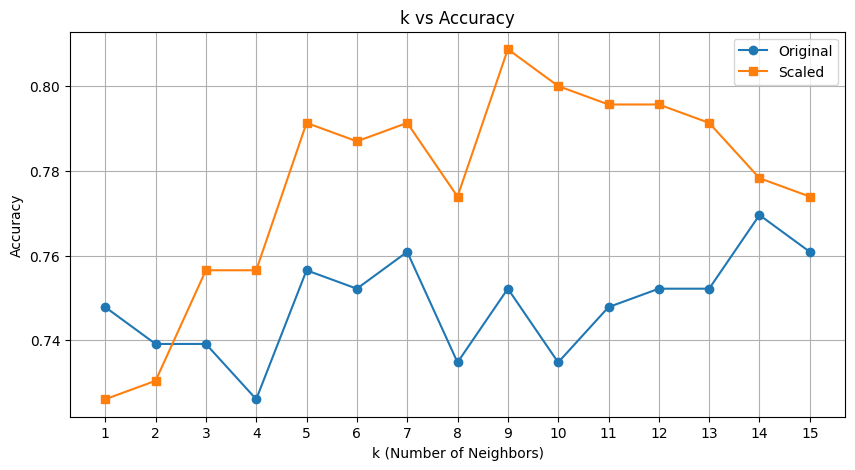

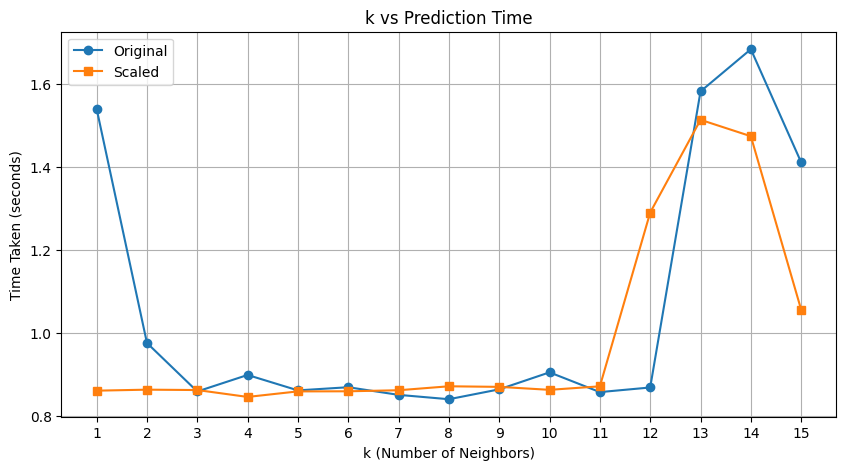

In [22]:
# Visualize the Results:
# Plot the following graphs:
import matplotlib.pyplot as plt

# Extract k values, accuracies, and times for original dataset
k_values = [r[0] for r in results_original]
acc_original = [r[1] for r in results_original]
time_original = [r[2] for r in results_original]

# Extract accuracies and times for scaled dataset
acc_scaled = [r[1] for r in results_scaled]
time_scaled = [r[2] for r in results_scaled]

# k vs. Accuracy for original and scaled datasets.
plt.figure(figsize=(10,5))
plt.plot(k_values, acc_original, marker='o', label='Original')
plt.plot(k_values, acc_scaled, marker='s', label='Scaled')
plt.title("k vs Accuracy")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# k vs. Time Taken for original and scaled datasets.
plt.figure(figsize=(10,5))
plt.plot(k_values, time_original, marker='o', label='Original')
plt.plot(k_values, time_scaled, marker='s', label='Scaled')
plt.title("k vs Prediction Time")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Analyze and Discuss:
# Discuss how the choice of k affects the accuracy and computational cost.
# Identify the optimal k based on your analysis.
  #For your dataset, the optimal k is 7 for the scaled data,because it gives the highest accuracy while maintaining stability.Smaller k may overfit; larger k may underfit.
  #hence Scaling features is beneficial for KNN accuracy.

In [ ]:
#4 Discuss the challenges of using KNN for large datasets and high-dimensional data.
  #KNN is simple and effective for small to medium datasets with low dimensions.
  #For large or high-dimensional data, computation cost, memory, and distance reliability are major issues.
# Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality reduction).
  #Strategies like approximate neighbors, dimensionality reduction, and data sampling can improve efficiency and maintain accuracy.